In [2]:
%matplotlib inline
import math
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from pandas import ExcelWriter
import pickle
import scipy as sp

In [3]:
def load_object(filename):
    with open(filename, 'rb') as fid:
        file = pickle.load(fid)
    return file

In [4]:
#load the codes
Qian2016codes = load_object('models/Qian2016codes.pkl')
Qian2018codes = load_object('models/Qian2018codes.pkl')
QianU2019codes = load_object('models/QianU2019codes.pkl')
QianR2019codes = load_object('models/QianR2019codes.pkl')
Sourcecodes = load_object('models/Sourcecodes.pkl')

#Load the DFs
Qian2016DF, Qian2016prob, Qian2016keys = load_object('models/Qian2016DF.pkl')
Qian2018DF, Qian2018prob, Qian2018keys = load_object('models/Qian2018DF.pkl')
QianU2019DF, QianU2019prob, QianU2019keys = load_object('models/QianU2019DF.pkl')
QianR2019DF, QianR2019prob, QianR2019keys = load_object('models/QianR2019DF.pkl')
SourceDF, Sourceprob, Sourcekeys = load_object('models/SourceDF.pkl')

clustersdata = [Qian2016DF, Qian2018DF, QianU2019DF, QianR2019DF, SourceDF]
probdata = [Qian2016prob, Qian2018prob, QianU2019prob, QianR2019prob, Sourceprob]
airkeys = [Qian2016keys, Qian2018keys, QianU2019keys, QianR2019keys, Sourcekeys]

In [5]:
def index(data, label):
    mini = data.reset_index()[data.reset_index()['labels'] == label].index.min()
    maxi = data.reset_index()[data.reset_index()['labels'] == label].index.max()
    return mini,maxi

# Compute total variation distance with respect to each source

# Get the total variational distance among the sources

## individual cells because of their memory and time demand

In [5]:
import scipy as sp
tvdistance = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                           Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 'cityblock')

In [6]:
tvdistance1 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]],
                                            Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [7]:
tvdistance2 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]], 'cityblock')

In [8]:
tvdistance3 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [9]:
tvdistance4 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]], 'cityblock')

In [10]:
tvdistance5 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]], 'cityblock')

In [11]:
tvdistance6 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]], 'cityblock')

In [12]:
tvdistance7 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [13]:
tvaverage = np.average(tvdistance)

In [14]:
tvaverage1 = np.average(tvdistance1)

In [15]:
tvaverage2 = np.average(tvdistance2)

In [16]:
tvaverage3 = np.average(tvdistance3)

In [17]:
tvaverage4 = np.average(tvdistance4)

In [18]:
tvaverage5 = np.average(tvdistance5)

In [19]:
tvaverage6 = np.average(tvdistance6)

In [20]:
tvaverage7 = np.average(tvdistance7)

In [21]:
tvdistance8 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]], 
                                            Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [22]:
tvdistance9 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]],
                                            Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [24]:
tvdistance10 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [25]:
tvdistance11 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]], 
                                             Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [26]:
tvdistance12 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]],
                                             Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [27]:
tvdistance13 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]],
                                             Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [29]:
tvdistance14 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]], 'cityblock')

In [30]:
tvaverage8 = np.average(tvdistance8)

In [31]:
tvaverage9 = np.average(tvdistance9)

In [32]:
tvaverage10 = np.average(tvdistance10)

In [33]:
tvaverage11 = np.average(tvdistance11)

In [34]:
tvaverage12 = np.average(tvdistance12)

In [35]:
tvaverage13 = np.average(tvdistance13)

In [36]:
tvaverage14 = np.average(tvdistance14)

In [37]:
tvdistance15 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [38]:
tvdistance16 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]], 'cityblock')

In [39]:
tvdistance17 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]], 'cityblock')

In [40]:
tvdistance18 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]], 'cityblock')

In [41]:
tvdistance19 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [43]:
tvdistance20 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]],
                                             Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]], 'cityblock')

In [44]:
tvaverage15 = np.average(tvdistance15)

In [45]:
tvaverage16 = np.average(tvdistance16)

In [46]:
tvaverage17 = np.average(tvdistance17)

In [47]:
tvaverage18 = np.average(tvdistance18)

In [48]:
tvaverage19 = np.average(tvdistance19)

In [49]:
tvaverage20 = np.average(tvdistance20)

In [51]:
tvdistance21 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [52]:
tvdistance22 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [53]:
tvdistance23 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [54]:
tvdistance24 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [56]:
tvdistance25 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]],
                                             Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]], 'cityblock')

In [57]:
tvaverage21 = np.average(tvdistance21)

In [58]:
tvaverage22 = np.average(tvdistance22)

In [59]:
tvaverage23 = np.average(tvdistance23)

In [60]:
tvaverage24 = np.average(tvdistance24)

In [61]:
tvaverage25 = np.average(tvdistance25)

In [62]:
tvdistance26 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]], 'cityblock')

In [63]:
tvdistance27 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]], 'cityblock')

In [64]:
tvdistance28 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [65]:
tvdistance29 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]], 'cityblock')

In [66]:
tvaverage26 = np.average(tvdistance26)

In [67]:
tvaverage27 = np.average(tvdistance27)

In [68]:
tvaverage28 = np.average(tvdistance28)

In [69]:
tvaverage29 = np.average(tvdistance29)

In [70]:
tvdistance30 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]], 'cityblock')

In [71]:
tvdistance31 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [72]:
tvdistance32 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]],
                                             Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]], 'cityblock')

In [73]:
tvaverage30 = np.average(tvdistance30)

In [74]:
tvaverage31 = np.average(tvdistance31)

In [75]:
tvaverage32 = np.average(tvdistance32)

In [76]:
tvdistance33 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]],
                                             Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [77]:
tvdistance34 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]],
                                             Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]], 'cityblock')

In [78]:
tvaverage33 = np.average(tvdistance33)

In [79]:
tvaverage34 = np.average(tvdistance34)

In [80]:
tvdistance35 = 0.5*sp.spatial.distance.cdist(Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]],
                                             Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]], 'cityblock')

In [81]:
tvaverage35 = np.average(tvdistance35)

In [6]:
#group everything together
soildust = [tvaverage, tvaverage1, tvaverage2, tvaverage3, tvaverage4, tvaverage5, tvaverage6, tvaverage7]
consdust = [tvaverage1, tvaverage14, tvaverage8, tvaverage9, tvaverage10, tvaverage11, tvaverage12, tvaverage13]
conssand = [tvaverage2, tvaverage8, tvaverage20, tvaverage15, tvaverage16, tvaverage17, tvaverage18, tvaverage19]
indemission  = [tvaverage3, tvaverage9, tvaverage15, tvaverage25, tvaverage21, tvaverage22, tvaverage23, tvaverage24]
urbfugdust = [tvaverage4, tvaverage10, tvaverage16, tvaverage21, tvaverage29, tvaverage26, tvaverage27, tvaverage28]
carexhaust = [tvaverage5, tvaverage11, tvaverage17, tvaverage22, tvaverage26, tvaverage32, tvaverage30, tvaverage31]
biomass = [tvaverage6, tvaverage12, tvaverage18, tvaverage23, tvaverage27, tvaverage30, tvaverage34, tvaverage33]
coalburning = [tvaverage7, tvaverage13, tvaverage19, tvaverage24, tvaverage28, tvaverage31, tvaverage33, tvaverage35]

totalaverage = [soildust, consdust, conssand, indemission, urbfugdust, carexhaust, biomass, coalburning]

NameError: name 'tvaverage' is not defined

<AxesSubplot:>

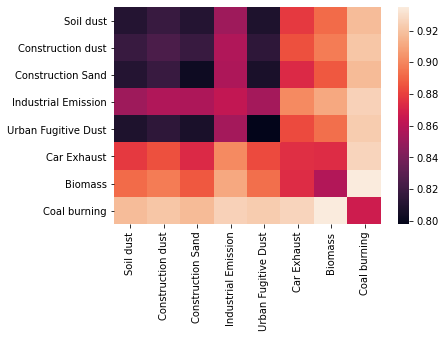

In [83]:
Index = ['Soil dust', 'Construction dust', 'Construction Sand', 'Industrial Emission', 'Urban Fugitive Dust', 'Car Exhaust', 'Biomass', 'Coal burning']
sns.heatmap(pd.DataFrame(totalaverage, index = Index, columns = Index))

In [7]:
#save object
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [85]:
save_object(totalaverage, 'outputdata/totalvariationavgsourceheatmap.pkl')

# Get the Percentage particle allocated to component by max probability value

In [8]:
soildustconf = np.zeros(Sourceprob[index(clustersdata[4], 'Soil dust')[0]: index(clustersdata[4], 'Soil dust')[1]].shape)
consdustconf = np.zeros(Sourceprob[index(clustersdata[4], 'Construction dust')[0]: index(clustersdata[4], 'Construction dust')[1]].shape)
conssandconf = np.zeros(Sourceprob[index(clustersdata[4], 'Construction sand')[0]: index(clustersdata[4], 'Construction sand')[1]].shape)
indemissionconf = np.zeros(Sourceprob[index(clustersdata[4], 'Industrial emission')[0]: index(clustersdata[4], 'Industrial emission')[1]].shape)
urbfugdustconf = np.zeros(Sourceprob[index(clustersdata[4], 'Urban fugitive dust')[0]: index(clustersdata[4], 'Urban fugitive dust')[1]].shape)
carexhaustconf = np.zeros(Sourceprob[index(clustersdata[4], 'Car exhaust')[0]: index(clustersdata[4], 'Car exhaust')[1]].shape)
biomassconf = np.zeros(Sourceprob[index(clustersdata[4], 'Biomass')[0]: index(clustersdata[4], 'Biomass')[1]].shape)
coalburningconf = np.zeros(Sourceprob[index(clustersdata[4], 'Coal burning')[0]: index(clustersdata[4], 'Coal burning')[1]].shape)

In [9]:
indexconf = ['Soil dust', 'Construction dust', 'Construction sand', 'Industrial emission', 'Urban fugitive dust', 'Car exhaust', 'Biomass', 'Coal burning']
conflist = [soildustconf, consdustconf, conssandconf, indemissionconf, urbfugdustconf, carexhaustconf, biomassconf, coalburningconf]

In [10]:
for indexm, matrix in zip(indexconf, conflist):
    print(indexm)
    intermediateargmax = Sourceprob[index(clustersdata[4], indexm)[0]: index(clustersdata[4], indexm)[1]].argmax(axis=1)
    intermediatemax = Sourceprob[index(clustersdata[4], indexm)[0]: index(clustersdata[4], indexm)[1]].max(axis=1)
    for i in np.arange(0, len(matrix)):
        matrix[i, intermediateargmax[i]] = intermediatemax[i]

Soil dust
Construction dust
Construction sand
Industrial emission
Urban fugitive dust
Car exhaust
Biomass
Coal burning


In [11]:
#find the average and the count for every component
confcountcomb = np.zeros([8, 30])
confavgcomb = np.zeros([8, 30])
for ind, conf in enumerate(conflist):
    confcount = np.zeros([1,30])
    for i in np.arange(0, 30):
        confcount[:,i] = len(conf[:,i][np.nonzero(conf[:,i])])/len(conf)

    confaverage = np.zeros([1,30])
    for i in np.arange(0, 30):
        confaverage[:,i] = np.average(conf[:,i][np.nonzero(conf[:,i])])
    confcountcomb[ind] = confcount
    confavgcomb[ind] = confaverage

# Percentage in each component respect to source

<AxesSubplot:>

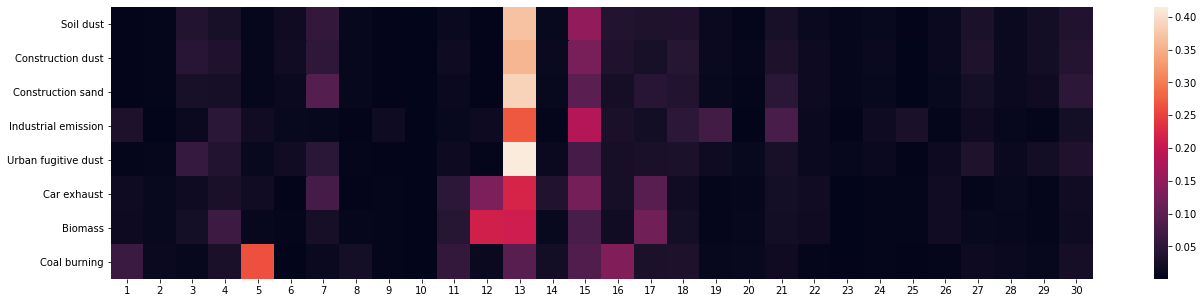

In [12]:
fig = plt.figure(figsize = (22,5))
sns.heatmap(pd.DataFrame(confcountcomb, index = indexconf, columns = np.arange(1,31)))

# Confidence of the max probability with respect to each source

<AxesSubplot:>

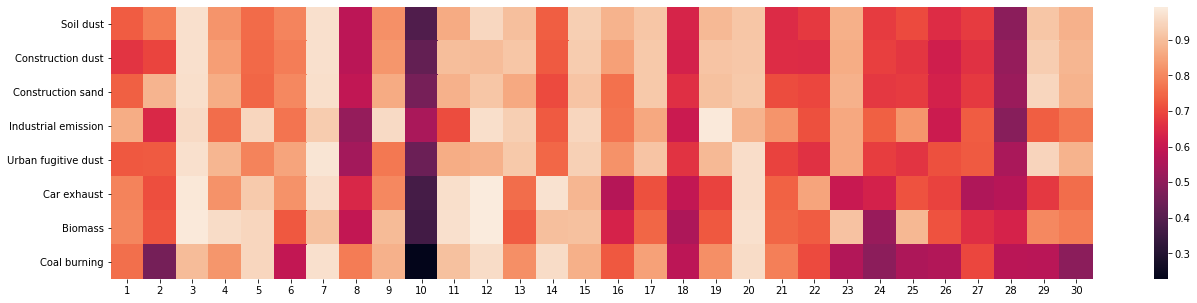

In [13]:
fig = plt.figure(figsize = (22,5))
sns.heatmap(pd.DataFrame(confavgcomb, index = indexconf, columns = np.arange(1,31)))

In [14]:
#create a total variation matrix for 1st sample Qian 2016
tvdistanceQian20161 = []
for j in Qian2016keys:
    tvmid = []
    for i in Sourcekeys:
        tvmid.append(0.5*sp.spatial.distance.cdist(Qian2016prob[index(clustersdata[0], j)[0]: index(clustersdata[0], j)[1]],
                                                  Sourceprob[index(clustersdata[4], i)[0]: index(clustersdata[4], i)[1]], 'cityblock'))
    tvdistanceQian20161.append(tvmid)

In [33]:
Qian2016avglist = []
for l in tvdistanceQian20161:
    Qian2016avg = np.zeros([len(l[0]), 8])
    for i,j in enumerate(l):
        Qian2016avg[:,i] = np.average(j, axis = 1)
    Qian2016avglist.append(Qian2016avg)

In [14]:
#get the maximum for each source
Qian2016avg.argmin(axis=1)

array([4, 4, 4, ..., 3, 3, 5], dtype=int64)

In [25]:
#get the corresponding keys
np.array([Sourcekeys[i] for i in Qian2016avg.argmin(axis=1)])

array(['Industrial emission', 'Industrial emission',
       'Industrial emission', ..., 'Coal burning', 'Coal burning',
       'Urban fugitive dust'], dtype='<U19')

In [35]:
#get the counts and unique sources
uniquelist = []
for j in Qian2016avglist:
    uniquelist.append(np.unique(np.array([Sourcekeys[i] for i in j.argmin(axis=1)]), return_counts = True))

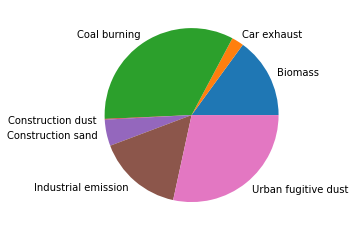

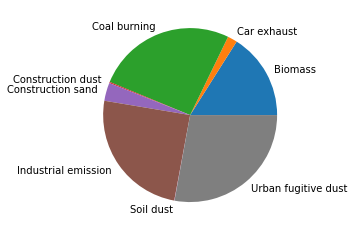

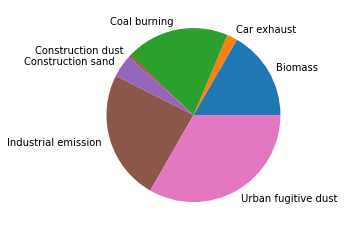

<ipython-input-37-07b8ea0837c5>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(i[1]/i[1].sum(), labels = i[0])


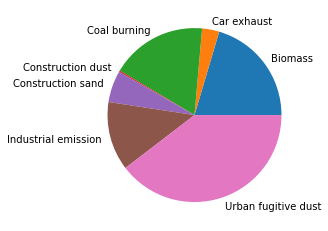

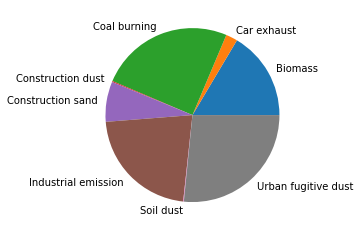

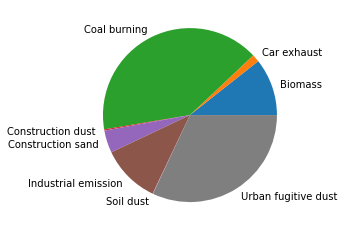

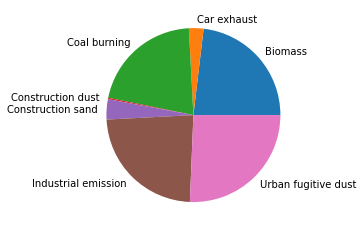

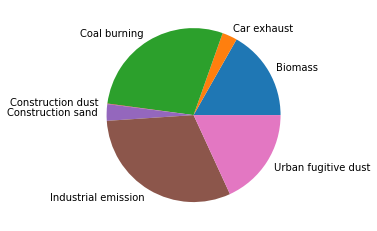

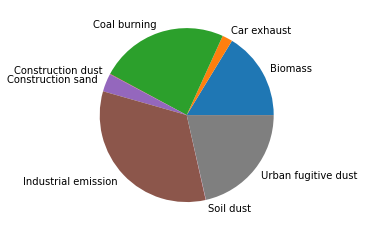

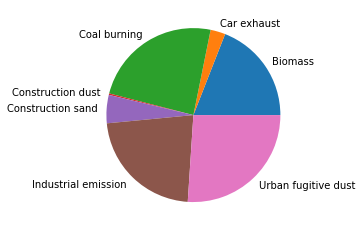

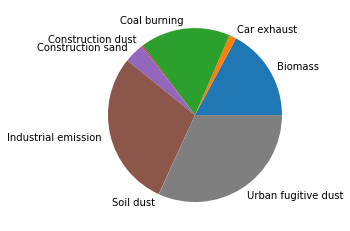

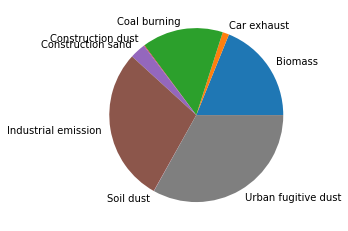

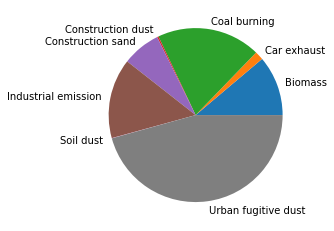

In [37]:
for i in uniquelist:
    plt.pie(i[1]/i[1].sum(), labels = i[0])
    plt.show()

In [21]:
Qian2016avgconf = np.zeros([len(Qian2016avg), 8])

In [22]:
#just get the minimum distance values
for (index, maxi), argmaxi in zip(enumerate(Qian2016avg.min(axis=1)), Qian2016avg.argmin(axis=1)):
    Qian2016avgconf[index, argmaxi] = maxi

In [23]:
#get average and std distance metrics of the minimum values
averagedist = np.array([np.average(Qian2016avgconf[np.nonzero(Qian2016avgconf[:,i]), i]) for i in np.arange(0, len(Sourcekeys))])

averagestd = np.array([np.std(Qian2016avgconf[np.nonzero(Qian2016avgconf[:,i]), i]) for i in np.arange(0, len(Sourcekeys))])

C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

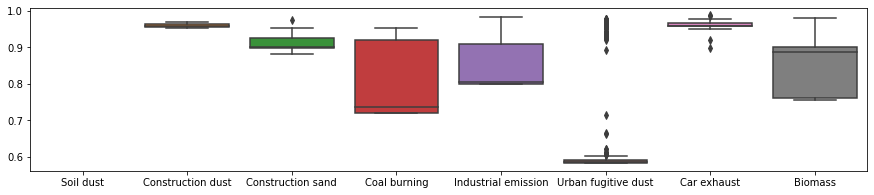

In [24]:
accumulatelist = [Qian2016avgconf[np.nonzero(Qian2016avgconf[:,i]), i] for i in np.arange(0, len(Sourcekeys))]

intermediatelist = []
for i in accumulatelist:
    intermediatelist.append(i[0])
    
fig = plt.figure(figsize = (15,3))    
sns.boxplot(data = pd.DataFrame(intermediatelist, index = Sourcekeys).T)